In [1]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

## LSTM Neural Network

## Read Dataset

In [2]:
df = pd.read_excel('中心城市客运量 巡游出租汽车 广州（原） .xlsx',engine='openpyxl',header=0,parse_dates=["时间"],index_col=[0])

In [3]:
df.head()

,中心城市客运量:巡游出租汽车:广州:当期值:月
时间,
2022-12-31,1488
2022-11-30,1355
2022-10-31,2489
2022-09-30,3110
2022-08-31,3481


In [4]:
df.sort_values('时间', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2019-01-31 to 2022-12-31
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   中心城市客运量:巡游出租汽车:广州:当期值:月  48 non-null     int64
dtypes: int64(1)
memory usage: 768.0 bytes


In [6]:
df.head()

,中心城市客运量:巡游出租汽车:广州:当期值:月
时间,
2019-01-31,5391
2019-02-28,4451
2019-03-31,5515
2019-04-30,5249
2019-05-31,5083


In [7]:
# 确保索引为日期时间类型
df.index = pd.to_datetime(df.index)

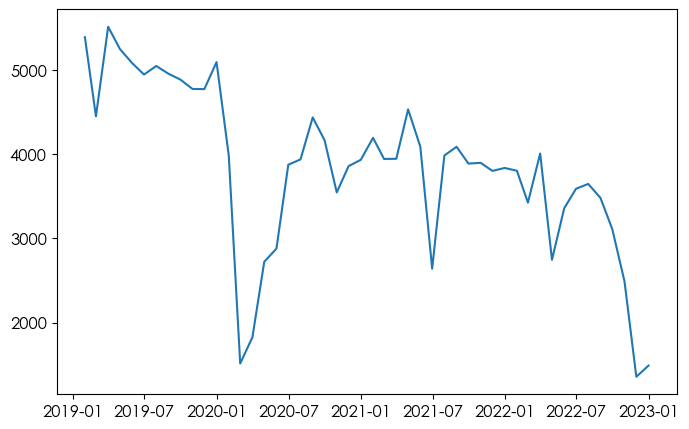

In [8]:
plt.figure(figsize=(8,5))
plt.rc('font', family='STXihei', size=12)
plt.plot(df.index, df["中心城市客运量:巡游出租汽车:广州:当期值:月"], linestyle="-")
plt.xlabel=('时间')
plt.ylabel=('中心城市客运量:巡游出租汽车:广州:当期值:月')
plt.show();

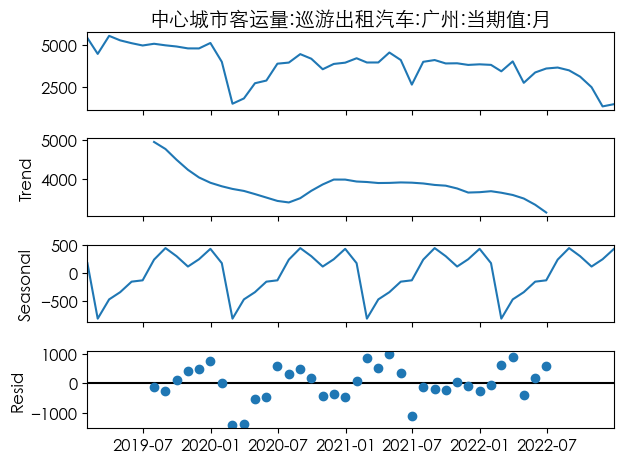

In [9]:
# 经典季节性时间序列分解
a = seasonal_decompose(df["中心城市客运量:巡游出租汽车:广州:当期值:月"], model = "add")
plt.rc('font', family='STXihei', size=12)
a.plot();

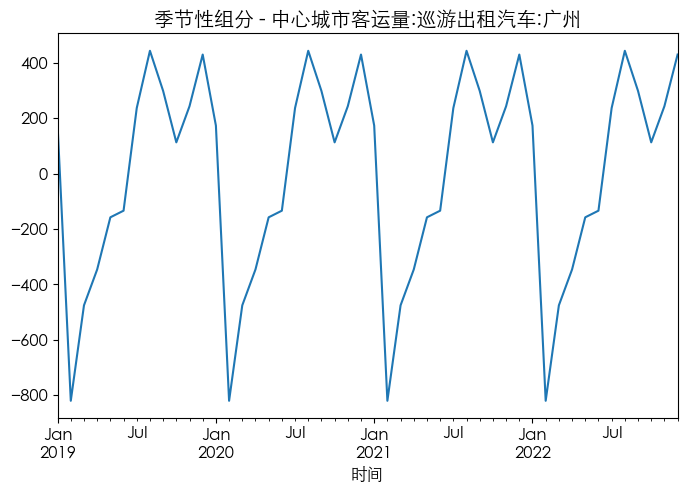

In [10]:
# 分析时间序列数据中的季节性变动
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))
plt.rc('font', family='STXihei', size=12)
plt.title('季节性组分 - 中心城市客运量:巡游出租汽车:广州')
a.seasonal.plot();

## ARIMA Forecast

Let's run auto_arima() function to get best p,d,q,P,D,Q values

In [11]:
auto_arima(df['中心城市客运量:巡游出租汽车:广州:当期值:月'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -372.818
Date:                Tue, 07 May 2024   AIC                            747.637
Time:                        23:19:07   BIC                            749.487
Sample:                    01-31-2019   HQIC                           748.333
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.542e+05   6.12e+04      7.426      0.000    3.34e+05    5.74e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                17.21
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                            -0.93
Prob(H) (two-sided):                  0.09   Kurtosis:                         5.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As we can see best arima model chosen by auto_arima() is SARIMAX(0, 1, 0)x(4, 0, 3, 12)

**For some reason "pmdarima" wasn't installed at Kaggle. Thats's why I couldn't use "auto_arima()" here. But you can see same output below where "arima_model" defined.**

Let's split the data into train and test set

In [12]:
train_data = df
test_data = df

In [13]:
arima_model = SARIMAX(train_data['中心城市客运量:巡游出租汽车:广州:当期值:月'], order = (0,1,0), seasonal_order = (5,1,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    中心城市客运量:巡游出租汽车:广州:当期值:月   No. Observations:                   48
Model:             SARIMAX(0, 1, 0)x(5, 1, [1, 2, 3], 12)   Log Likelihood                -279.967
Date:                                    Tue, 07 May 2024   AIC                            577.934
Time:                                            23:19:27   BIC                            591.932
Sample:                                        01-31-2019   HQIC                           582.766
                                             - 12-31-2022                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.7373   3948.107     -0.000      1.000   -7739.884    7736.410
ar.S.L24      -1.4482   2380.850     -0.001      1.000   -4667.829    4664.933
ar.S.L36      -0.7485   1504.687     -0.000      1.000   -2949.881    2948.384
ar.S.L48       0.1978    810.298      0.000      1.000   -1587.956    1588.352
ar.S.L60       0.4904    818.426      0.001      1.000   -1603.595    1604.575
ma.S.L12       0.6326   1.29e+04    4.9e-05      1.000   -2.53e+04    2.53e+04
ma.S.L24      -0.8137   1.93e+04  -4.22e-05      1.000   -3.78e+04    3.78e+04
ma.S.L36      -0.8187   1.66e+04  -4.92e-05      1.000   -3.26e+04    3.26e+04
sigma2      4.971e+04      0.205   2.43e+05      0.000    4.97e+04    4.97e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.01   Jarque-Bera (JB):                 1.07
Prob(Q):                              0.31   Prob(JB):                         0.58
Heteroskedasticity (H):               1.63   Skew:                            -0.43
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.61e+26. Standard errors may be unstable.
"""

In [14]:
n_future = 36  # 预测未来的时间点数量
arima_pred = arima_result.predict(start = len(df), end = len(df) + n_future - 1,typ="levels").rename("SARIMA Predictions")
arima_pred

2023-01-31    2231.917694
2023-02-28     490.800037
2023-03-31    1294.963502
2023-04-30    1934.733089
2023-05-31    1642.931185
2023-06-30    1854.562159
2023-07-31    1982.147683
2023-08-31    2189.829796
2023-09-30    2137.635309
2023-10-31    1987.798295
2023-11-30    2520.434067
2023-12-31    2770.590669
2024-01-31    2020.294386
2024-02-29     379.929738
2024-03-31     540.982974
2024-04-30    1253.781128
2024-05-31    1250.181536
2024-06-30    1320.411149
2024-07-31    1920.317841
2024-08-31    2275.351796
2024-09-30    1985.292656
2024-10-31    1535.807075
2024-11-30    1577.287126
2024-12-31    1623.438436
2025-01-31    1630.429609
2025-02-28    1496.905757
2025-03-31    1596.562855
2025-04-30    1475.117979
2025-05-31    1450.116342
2025-06-30     593.135080
2025-07-31    1473.546511
2025-08-31    1471.328940
2025-09-30    1208.169478
2025-10-31     994.654142
2025-11-30     467.370639
2025-12-31     502.864091
Freq: M, Name: SARIMA Predictions, dtype: float64

In [15]:
future_index = pd.date_range(start=df.index[-1], periods=n_future + 1, freq='M')[1:]
future_index

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31',
               '2025-09-30', '2025-10-31', '2025-11-30', '2025-12-31'],
              dtype='datetime64[ns]', freq='M')

In [16]:
arima_pred_series = pd.Series(arima_pred.values, index=future_index, name='SARIMA Predictions')
arima_pred_series

2023-01-31    2231.917694
2023-02-28     490.800037
2023-03-31    1294.963502
2023-04-30    1934.733089
2023-05-31    1642.931185
2023-06-30    1854.562159
2023-07-31    1982.147683
2023-08-31    2189.829796
2023-09-30    2137.635309
2023-10-31    1987.798295
2023-11-30    2520.434067
2023-12-31    2770.590669
2024-01-31    2020.294386
2024-02-29     379.929738
2024-03-31     540.982974
2024-04-30    1253.781128
2024-05-31    1250.181536
2024-06-30    1320.411149
2024-07-31    1920.317841
2024-08-31    2275.351796
2024-09-30    1985.292656
2024-10-31    1535.807075
2024-11-30    1577.287126
2024-12-31    1623.438436
2025-01-31    1630.429609
2025-02-28    1496.905757
2025-03-31    1596.562855
2025-04-30    1475.117979
2025-05-31    1450.116342
2025-06-30     593.135080
2025-07-31    1473.546511
2025-08-31    1471.328940
2025-09-30    1208.169478
2025-10-31     994.654142
2025-11-30     467.370639
2025-12-31     502.864091
Freq: M, Name: SARIMA Predictions, dtype: float64

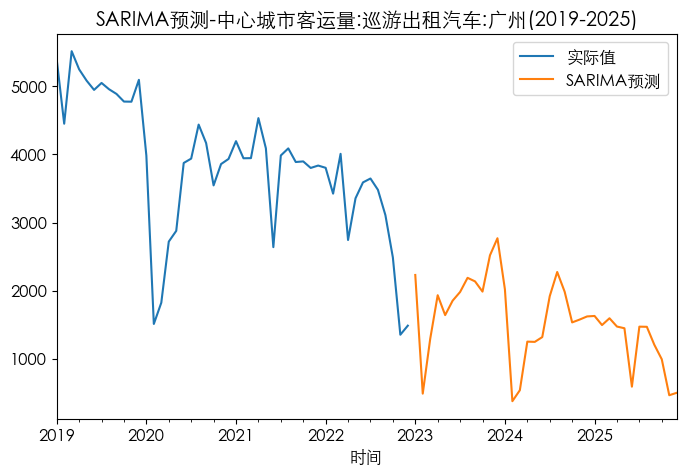

In [17]:
# 绘制测试数据和 SARIMA 模型的预测结果
plt.figure(figsize=(8, 5))
df['中心城市客运量:巡游出租汽车:广州:当期值:月'].plot(label='实际值', legend=True)
arima_pred_series.plot(label='SARIMA预测', legend=True)
plt.title('SARIMA预测-中心城市客运量:巡游出租汽车:广州(2019-2025)')
plt.show()

## LSTM Forecast

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='relu',input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
lstm_model.fit(generator, epochs=150,batch_size=32)

Epoch 1/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1550
Epoch 2/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0351
Epoch 3/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0399
Epoch 4/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0830
Epoch 5/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0255
Epoch 6/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0389
Epoch 7/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0411
Epoch 8/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0475
Epoch 9/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0408
Epoch 10/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0353
Epoch 11/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0400
Epoch 12/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0243  
Epoch 13/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0380
Epoch 14/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0329
Epoch 15/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0301
Ep

Text(0.5, 1.0, '中心城市客运量:巡游出租汽车:广州 LSTM训练损失')

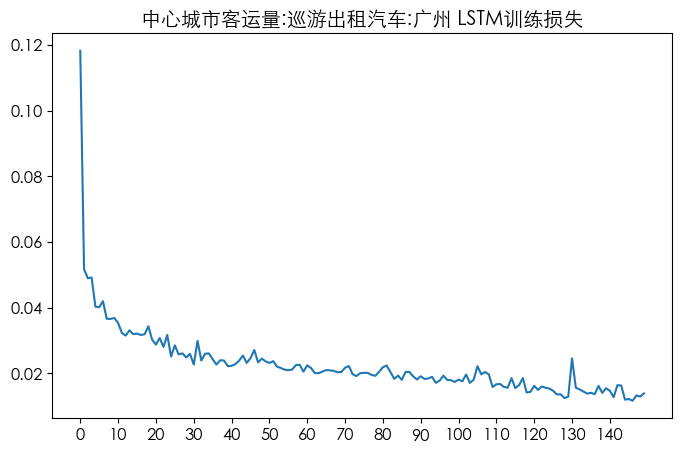

In [23]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(8,5))
plt.xticks(np.arange(0,150,10))
plt.plot(range(len(losses_lstm)),losses_lstm);
plt.title('中心城市客运量:巡游出租汽车:广州 LSTM训练损失')

In [24]:
# 生成时间序列预测
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)+36):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

As you know we scaled our data that's why we have to inverse it to see true predictions.

In [25]:
lstm_predictions_scaled

[array([-0.08263737], dtype=float32),
 array([-0.03037856], dtype=float32),
 array([0.1593742], dtype=float32),
 array([0.4508369], dtype=float32),
 array([0.63654155], dtype=float32),
 array([0.71540695], dtype=float32),
 array([0.74901575], dtype=float32),
 array([0.7713175], dtype=float32),
 array([0.8116689], dtype=float32),
 array([0.81449586], dtype=float32),
 array([0.80247015], dtype=float32),
 array([0.8012663], dtype=float32),
 array([0.77964777], dtype=float32),
 array([0.73160887], dtype=float32),
 array([0.64547265], dtype=float32),
 array([0.5657642], dtype=float32),
 array([0.48746356], dtype=float32),
 array([0.41326085], dtype=float32),
 array([0.40551302], dtype=float32),
 array([0.38793513], dtype=float32),
 array([0.36859185], dtype=float32),
 array([0.34323183], dtype=float32),
 array([0.31800294], dtype=float32),
 array([0.3098373], dtype=float32),
 array([0.3186776], dtype=float32),
 array([0.36005986], dtype=float32),
 array([0.44632372], dtype=float32),
 array(

In [26]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [27]:
lstm_predictions

array([[1011.22854233],
       [1228.62519979],
       [2017.99670219],
       [3230.48149109],
       [4003.01282883],
       [4331.09292984],
       [4470.90551376],
       [4563.6807251 ],
       [4731.54251099],
       [4743.30278397],
       [4693.27581406],
       [4688.26786041],
       [4598.33471298],
       [4398.4928894 ],
       [4040.16620636],
       [3708.57902527],
       [3382.84842491],
       [3074.16512489],
       [3041.93415642],
       [2968.81014824],
       [2888.34207535],
       [2782.84440041],
       [2677.89222717],
       [2643.92321587],
       [2680.69883347],
       [2852.84900665],
       [3211.70668602],
       [3601.55704498],
       [3944.1893959 ],
       [4215.32482147],
       [4222.56015778],
       [3918.01795959],
       [3713.09528351],
       [3687.62233734],
       [3714.13223267],
       [3728.4040451 ],
       [3712.08213806],
       [3625.68408966],
       [3481.35822296],
       [3317.99236298],
       [3145.66291809],
       [2958.838

In [28]:
len(lstm_predictions)

84

In [29]:
df1 = pd.DataFrame(lstm_predictions, columns=['LSTM_predictions'])
# 查看DataFrame
print(df.head())

            中心城市客运量:巡游出租汽车:广州:当期值:月
时间                                 
2019-01-31                     5391
2019-02-28                     4451
2019-03-31                     5515
2019-04-30                     5249
2019-05-31                     5083


In [30]:
# 创建日期范围
dates = pd.date_range(start='2019-01-31', periods=len(lstm_predictions), freq='M')

# 创建DataFrame
df1 = pd.DataFrame(lstm_predictions.flatten(), index=dates, columns=['LSTM_Predictions'])
df1

,LSTM_Predictions
2019-01-31,1011.228542
2019-02-28,1228.625200
2019-03-31,2017.996702
2019-04-30,3230.481491
2019-05-31,4003.012829
...,...
2025-08-31,3878.294277
2025-09-30,3906.432743
2025-10-31,3856.677532
2025-11-30,3707.323380


Text(0.5, 1.0, 'LSTM预测-中心城市客运量:巡游出租汽车:广州(2019-2025)')

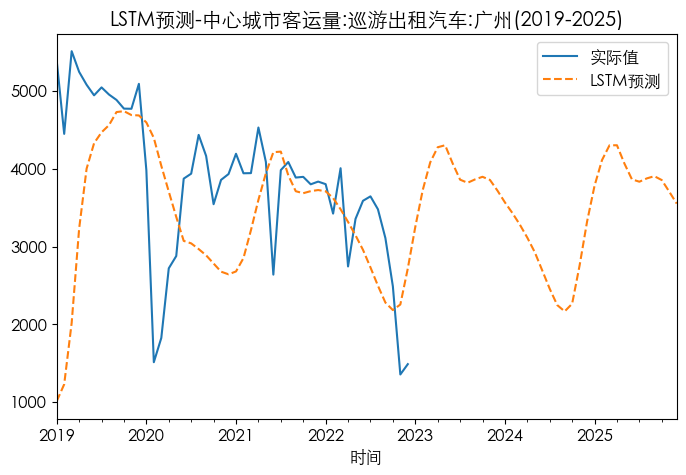

In [31]:
plt.rc('font', family='STXihei', size=12)
train_data['中心城市客运量:巡游出租汽车:广州:当期值:月'].plot(figsize = (8,5),label='实际值', legend=True)
df1['LSTM_Predictions'].plot(legend = True,label='LSTM预测', linestyle='--');
plt.title('LSTM预测-中心城市客运量:巡游出租汽车:广州(2019-2025)')